<a href="https://colab.research.google.com/github/Richardjmorton/KL7002_students/blob/main/Labs1_Reading_in_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  import sunpy
  print("module 'sunpy' is installed")
except ModuleNotFoundError:
  !pip install sunpy

try:
  import zeep
  print("module 'zeep' is installed")
except ModuleNotFoundError:
  !pip install zeep

try:
  import drms
  print("module 'drms' is installed")
except ModuleNotFoundError:
  !pip install drms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 21.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.2/101.2 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#module imports
import numpy as np
import matplotlib.pyplot as plt

# makes plots appear in notebook
%matplotlib inline



## Paths

When working with data, it will be stored in some location in your computer. You may launch Python (or a notebook) from a different location and require access to the data files stored elsewhere.

It can be helpful to use Python's native module *os* which permits you to use your [operating systems functionality](https://docs.python.org/3.7/library/os.html).

When you run Python from the terminal, it starts in the directory or folder you are currently working in (unsurprisingly called the *current working directory*). If you use a developer environment, e.g. Pycharm, then you can choose a default working directory.

If you don't know what directory you are working in, you can query this:

In [3]:
# When you run this you will get a different answer...which is *your* CWD

import os
print(os.getcwd()) # returns current working directory

/content


You can see that the result is a path to the directory on my computer where I am working.

The first part of the output refers to the home directory, `/Users/richardmorton`. To find your home directory, you can use the following function in *os*

In [4]:
# When you run this you will get a different answer

from os.path import expanduser

home = expanduser("~")

print(home)

/root


You can build paths up in order to access different directories and files.

As as simple example, suppose your working in a directory called `top_deck` and your data is stored in a sub folder, called `data_folder`, e.g.

```
top_deck/
   |- analysis_notebook.ipynb
   |- data_folder
      |- star_data.fits
      |- table.csv
```

You can build paths by using strings in the following way:

In [5]:
# create string for file path
path = (home, 'top_deck', 'data_folder/table.csv')

s = '/'
filepath = s.join(path)
print(filepath)

/root/top_deck/data_folder/table.csv


These strings can then be used with functions that read in information within files.

<br>

When writing code for others, the above way of constructing paths can be system dependent, i.e., depends on if you are using Windows, Mac OsX etc.In the above example, the `/` used for separating directories is the Mac OsX way, while windows uses `\`.

There are of course options to build system agnostic paths. This can be done using the `pathlib` module. You can find a detailed example of how the is module works [here](https://realpython.com/python-pathlib/).



In [6]:
# import Path class from pathlib
from pathlib import Path

#
Path.home()


PosixPath('/root')

We can see here a `PosixPath` object is created, this would have been a `WindowsPath` object if I had run this code on windows.

There are a number of useful methods that come with the `Path` class that make it easier to build and inspect paths.

For example, paths can be joined using the `/` operator.

In [7]:
root = Path.home()
new_path = root/ 'top_deck' / 'data_folder'
new_path

PosixPath('/root/top_deck/data_folder')

Here I just show a few other useful methods

In [8]:
# Checking to see if a file or directory exists:
new_path.exists()

False

In [9]:
# Access the name of the file that the path is pointing to
path_to_data = new_path / "table.csv"
path_to_data.name

'table.csv'

In [10]:
# Create a new directory, named 'new_folder' within the root directory
new_dir = root / "new_folder"
new_dir.mkdir()

## Astropy

<img src='https://upload.wikimedia.org/wikipedia/commons/5/5a/Logo_of_the_Astropy_Project.png' height =200 width =200>

Astropy is a package that provides tool and functionality for performing common astronomical tasks in Python.

As with all packages/modules introduced in this course, we will only cover a few features. A detailed description of astropy and the range of functions can be found at: [http://docs.astropy.org/en/stable/index.html](http://docs.astropy.org/en/stable/index.html)


### Reading in fits files

Astronomical data is typically stored in _fits_ files. In order to read them into Python we need to load part of the _Astropy_ package, which contains the necessary functions.

To load the _astropy.io_ module:

```Python
from astropy.io import fits
```

The first step is to define where the data file is, so Python knows where to find it:

```Python
file = 'sun_data/....fits'
```

We then call a function to open the file:

```Python
hdul = fits.open(file)
```

What this command does is open an HDU (Header Data Unit). This is the highest level component of the FITS file structure, consisting of a header and (typically) a data array or table.

We can explore the HDU with an actual fits file. I have based the following loosely on the [astropy tutorial](http://docs.astropy.org/en/stable/io/fits/index.html).

First, let us download a fits file:

In [11]:
from astropy.io import fits
from astropy.utils.data import download_file
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True )

We can now open the fits file and use the _info_ method to see what the file contains.

In [12]:
with fits.open(image_file) as hdul:
    hdu_list=hdul

hdu_list.info()

Filename: /root/.astropy/cache/download/url/ff6e0b93871033c68022ca026a956d87/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   


We see that the file contains one extension, the primary extension indexed as 0.

For the Primary extension, we can see by looking at the _Dimensions_ and _Format_ that we are dealing with an image.

The cards column gives use the number of tags in the fits header.

The fits header contains a standard set of information that describes the observation of the data and also provides information about the data product.

In [13]:
hdu_list[0].header

SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               
PLATEID = 'A0JP    '           /GSSS: Plate ID                                  
SCANNUM = '01      '           /GSSS: Scan Number                               
DSCNDNUM= '00      '        

The header can be accessed like a dictionary, in the sense it has keys and values. For example, we can find the date that the fits file was created or the name of the telescope that took the picture.

In [14]:
head = hdu_list[0].header
print(head['DATE'])
print(head['TELESCOP'])

2014-01-09
UK Schmidt - Doubl


The data in the extension is accessed with ```.data```:

In [15]:
with fits.open(image_file) as hdul:
    image_data = hdul[0].data

The data can be found to be returned as a _numpy_ array. And looking at the shape of the data, we can see it corresponds to the information given with ```.info```.

In [16]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


Having a numpy array means we can display the data simply with matplotlib, e.g., using ```plt.imshow```.

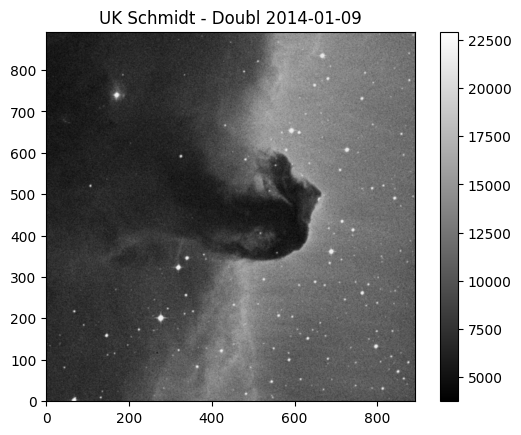

In [17]:
plt.imshow(image_data, cmap='gray', origin='lower')

s = ' '
title = s.join((head['telescop'], head['date']))

plt.title(title)
plt.colorbar();

### Astropy units & constants

Astropy has functionality such that numbers can be associated with units, which means you can create a calculation that also outputs the correct units! Not only does this provide you with the relevant units, it also provides a mechanism to check you have implemented your calculation correctly - wrong units means a mistake.

The astropy units can be found by loading in the [units module](http://docs.astropy.org/en/stable/units/):

In [3]:
from astropy import units as u

The units can then be applied to a range of python objects:

In [19]:
print(15 * u.meter)
print(np.arange(10) * u.second)
print(type(15 * u.meter))

15.0 m
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] s
<class 'astropy.units.quantity.Quantity'>


You can see that when we check the type of the value and unit, it forms a [_quantity_ object](http://docs.astropy.org/en/stable/units/quantity.html#quantity).

You can assign the quantity to a variable and access methods and attributes of quantity. For example, you can get back the value or the unit:

In [20]:
dist = 23 * u.meter
print(dist.value)
print(dist.unit)

23.0
m


You can also change between SI and CGS units:

In [21]:
print(dist.cgs)

2300.0 cm


As mentioned, you can do something more practical, like undertaking calculations:

In [22]:
time = 0.5 * u.second
speed = dist / time
print(speed)
print(
    speed.to(u.kilometer /
             u.hour))  # convert to another system of units with the .to method

46.0 m / s
165.6 km / h


As well as units, astropy also contains constants, which are potentially useful for your calculations. To get access to the constants you need to import the constants module.

In [23]:
from astropy import constants as const

print(const.G)

  Name   = Gravitational constant
  Value  = 6.6743e-11
  Uncertainty  = 1.5e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2018


For example, you might want to calculate the gravitional potential energy:
<br>

$$U=-\frac{GM_\odot m}{r}$$
<br>

for a human orbiting the Sun at 3 AU.

In [24]:
mass_human = 70 * u.kilogram
U = -const.G * const.M_sun * mass_human / (3 * u.AU)
print(U)
print(U.decompose())  # decompose to irreducible units

-3.0966236e+21 kg m3 / (AU s2)
-20699650239.07255 kg m2 / s2


## Sunpy

<img src='https://upload.wikimedia.org/wikipedia/commons/4/4e/SunPy_Logo.svg' width =200 height =200>

[Sunpy](https://sunpy.org) is solar specific package for downloading and manipulating data from solar space missions. However, I highlight that it doesn't perform the necessary calibration steps for certain instruments (e.g. NASA's Solar Dynamics Observatory) in order to create science-ready data.

Depending on the data you want to use, you may have to use another language called IDL in order to process the data to science-ready level. IDL has been the standard language in Solar Physics for a couple of decades, but there is a gradual movement of the community towards Python. The NASA recognised software is currently only distributed via [solarsoft](https://sohowww.nascom.nasa.gov/solarsoft/), which is IDL specific.

More recent solar missions are developing core codes with Python.

However, we can still access the most basic data products (typically called Level 1).

We will look at getting data from a couple of different facilities with Sunpy. We focus on the Solar Dynamic Observatory, which is providing high quality, full Sun images and is used in many observational studies of the Sun's atmosphere and surface.


I highly recommened going through the `sunpy` documentation yourself. The best place to start is the [tutorials](https://docs.sunpy.org/en/stable/tutorial/).

### Downloading data

The data for NASA missions is stored at the [Joint Science Operation Centre (JSOC)](http://jsoc.stanford.edu) and can also be found on the [Virtual Solar Observatory (VSO)](https://sdac.virtualsolar.org/cgi/search).


We are going to somewhat follow the tutorials available in the [Sunpy docs](https://docs.sunpy.org/en/stable/tutorial/acquiring_data/index.html), although I will make some changes.

First, let us import the tools from Sunpy. Their search tool is called Fido.

In [4]:
import sunpy
from sunpy.net import Fido, attrs as a

Fido is able to access data from many data respositories.

In [26]:
print(Fido)

sunpy.net.Fido

Fido is a unified data search and retrieval tool.

It provides simultaneous access to a variety of online data sources, some
cover multiple instruments and data products like the Virtual Solar
Observatory and some are specific to a single source.

For details of using `~sunpy.net.Fido` see :ref:`sunpy-tutorial-acquiring-data-index`.


      Client      ...
----------------- ...
CDAWEBClient      ...
EVEClient         ...
GBMClient         ...
XRSClient         ...
SUVIClient        ...
GONGClient        ...
LYRAClient        ...
NOAAIndicesClient ...
NOAAPredictClient ...
SRSClient         ...
NoRHClient        ...
RHESSIClient      ...
HEKClient         ...
HECClient         ...
JSOCClient        ...
VSOClient         ...


You need to define attributes of the data that you want to search with. These are found in the *attrs* submodule, for example

```python
a.Instrument
```
gives you the name of solar missions currently supported and also the clients where you can obtain data.

In [27]:
a.Instrument

Attribute Name,Client,Full Name,Description
aia,VSO,AIA,Atmospheric Imaging Assembly
bcs,VSO,BCS,Bragg Crystal Spectrometer
be_continuum,VSO,BE-Continuum,INAF-OACT Barra Equatoriale Continuum Instrument
be_halpha,VSO,BE-Halpha,INAF-OACT Barra Equatoriale Hα Instrument
bigbear,VSO,Big Bear,"Big Bear Solar Observatory, California TON and GONG+ sites"
caii,VSO,CAII,Kanzelhöhe Ca II k Instrument
cds,VSO,CDS,Coronal Diagnostic Spectrometer
celias,VSO,CELIAS,"Charge, Element, and Isotope Analysis System"
cerrotololo,VSO,Cerro Tololo,"Cerro Tololo, Chile GONG+ site"
chp,VSO,chp,Chromospheric Helium-I Imaging Photometer


<br>
<br>

Let us search for some AIA data from 2014 on 29 August, between 13:00 and 13:15.

In [28]:
date = a.Time('2014-08-29 13:00', '2014-08-29 13:15')

results = Fido.search(date, a.Instrument.aia)

In [29]:
results

Start Time,End Time,Source,Instrument,Wavelength,Provider,Physobs,Wavetype,Extent Width,Extent Length,Extent Type,Size
,,,,Angstrom,,,,,,,Mibyte
Time,Time,str3,str3,float64[2],str4,str9,str6,str4,str4,str8,float64
2014-08-29 13:00:01.000,2014-08-29 13:00:02.000,SDO,AIA,94.0 .. 94.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2014-08-29 13:00:02.000,2014-08-29 13:00:03.000,SDO,AIA,335.0 .. 335.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2014-08-29 13:00:06.000,2014-08-29 13:00:07.000,SDO,AIA,193.0 .. 193.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2014-08-29 13:00:07.000,2014-08-29 13:00:08.000,SDO,AIA,304.0 .. 304.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2014-08-29 13:00:07.000,2014-08-29 13:00:08.000,SDO,AIA,4500.0 .. 4500.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2014-08-29 13:00:08.000,2014-08-29 13:00:09.000,SDO,AIA,131.0 .. 131.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2014-08-29 13:00:11.000,2014-08-29 13:00:12.000,SDO,AIA,171.0 .. 171.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2014-08-29 13:00:11.000,2014-08-29 13:00:12.000,SDO,AIA,211.0 .. 211.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844


We can see that 600 entries are returned, and AIA has 8 wavelength filter bandpasses (given in final column). Given that close to the start of the mission AIA has a cadence of 12s for each filter, 900 s / 12 s * 8 filters = 600 images. So, this is what we expect.

We might only be interested in one wavelength, hence we would add the following attribute to the search

```python
a.Wavelength(304*u.angstrom)

results = Fido.search(date, a.Instrument.aia, a.Wavelength(304*u.angstrom))
```

where we are focusing on data from the 304 Å channel. Note that we are using the astropy units here.

There are a number of other ways to filter the data, so look at the *attrs* attributes to see what can be achieved.

If we have a suitable set of data, we might want to download it.

In [30]:
results = Fido.search(date, a.Instrument.aia, a.Wavelength(304 * u.angstrom))

The results object in known as a <span style="color:blue">UnifiedResponse</span>, which can be indexed using standard Python formatting for 2d arrays.

The first dimension is always the clients dimension (no matter how many clients there are). If there is only one data client, it occupies the 0 index, e.g.

In [31]:
results[0, :]

Start Time,End Time,Source,Instrument,Wavelength,Provider,Physobs,Wavetype,Extent Width,Extent Length,Extent Type,Size
,,,,Angstrom,,,,,,,Mibyte
Time,Time,str3,str3,float64[2],str4,str9,str6,str4,str4,str8,float64
2014-08-29 13:00:07.000,2014-08-29 13:00:08.000,SDO,AIA,304.0 .. 304.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2014-08-29 13:00:19.000,2014-08-29 13:00:20.000,SDO,AIA,304.0 .. 304.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2014-08-29 13:00:31.000,2014-08-29 13:00:32.000,SDO,AIA,304.0 .. 304.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2014-08-29 13:00:43.000,2014-08-29 13:00:44.000,SDO,AIA,304.0 .. 304.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2014-08-29 13:00:55.000,2014-08-29 13:00:56.000,SDO,AIA,304.0 .. 304.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2014-08-29 13:01:07.000,2014-08-29 13:01:08.000,SDO,AIA,304.0 .. 304.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2014-08-29 13:01:19.000,2014-08-29 13:01:20.000,SDO,AIA,304.0 .. 304.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2014-08-29 13:01:31.000,2014-08-29 13:01:32.000,SDO,AIA,304.0 .. 304.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844


The second index corresponds to the particular data record. In the following we will download just a single data file, the 10th record. We will also specify the path to where it should be saved.

In [32]:
home =Path.home()
filepath = home / 'SDO'
if not filepath.exists():
  filepath.mkdir()

downloaded_files = Fido.fetch(results[0, 9], path=filepath)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia_lev1_304a_2014_08_29t13_01_55_12z_image_lev1.fits:   0%|          | 0.00/8.46M [00:00<?, ?B/s]

### Plotting maps

Now that we have downloaded data, we can create a Sunpy map object with the data.

The Sunpy maps are built on top of matplotlib and typical matplotlib commands work.

The maps provide a convenient way to show the image and includes some additional details about the data, e.g. date, correct solar coordinates.

For further information see [https://docs.sunpy.org/en/stable/guide/plotting.html#sunpy-plotting-convention](https://docs.sunpy.org/en/stable/guide/plotting.html#sunpy-plotting-convention)

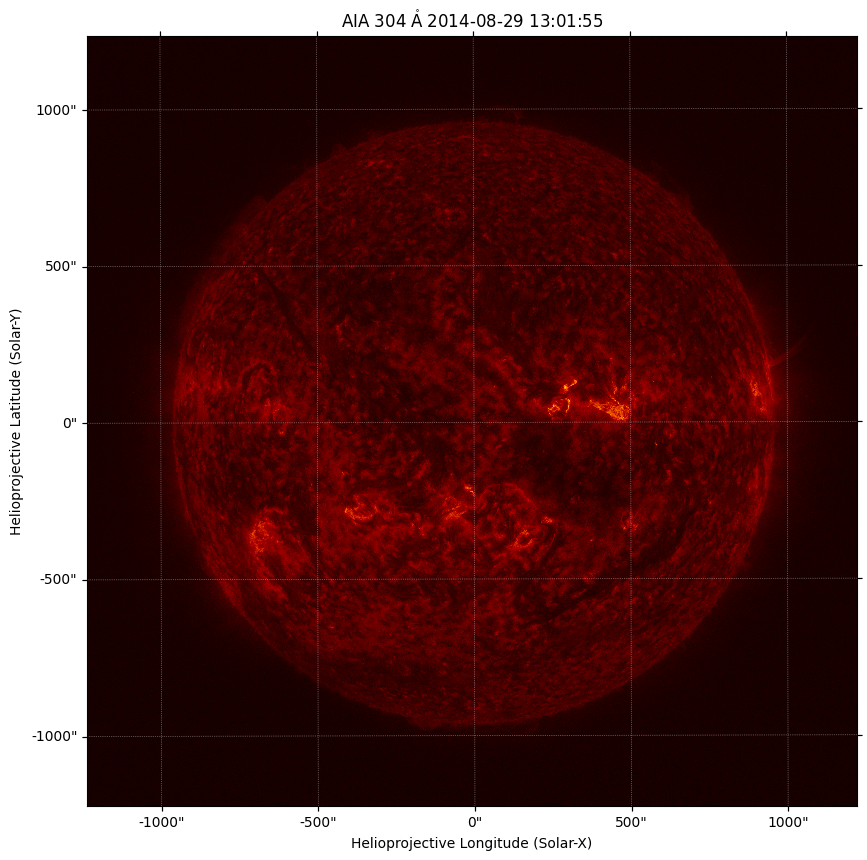

In [33]:
from sunpy.map import Map

# you will need to change the following path to run the code cell
path = downloaded_files[0]

# the following command should be changed to:
# aia_map = Map(downloaded_files)
aia_map = Map(path)

fig = plt.figure(figsize=(10, 10))
aia_map.plot()
plt.show()

In [34]:
downloaded_files[0]

'/root/SDO/aia_lev1_304a_2014_08_29t13_01_55_12z_image_lev1.fits'

### HMI example

The data from HMI is of a different form to that which comes from AIA. While AIA only takes images of the Sun at a particular wavelength, HMI can measure the magnetic field and line-of-sight velocities of the plasma in the photosphere.


There are a number of HMI data products avilable, e.g., intensity, magnetograms, Doppler velocities. We can see the different data products available to download:




In [35]:
import drms

client = drms.Client()
client.series('hmi*')

['hmi.B_720s',
 'hmi.B_720s_dcon',
 'hmi.B_720s_dconS',
 'hmi.Bharp_720s',
 'hmi.Bharp_720s_nrt',
 'hmi.Ic_45s',
 'hmi.Ic_45s_dcon',
 'hmi.Ic_720s',
 'hmi.Ic_720s_dcon',
 'hmi.Ic_720s_dconS',
 'hmi.Ic_noLimbDark_720s',
 'hmi.Ld_45s_dcon',
 'hmi.Ld_720s',
 'hmi.Ld_720s_dcon',
 'hmi.Ld_720s_dconS',
 'hmi.Lw_45s',
 'hmi.Lw_45s_dcon',
 'hmi.Lw_720s',
 'hmi.Lw_720s_dcon',
 'hmi.Lw_720s_dconS',
 'hmi.ME_720s_fd10',
 'hmi.ME_720s_fd10_dcon',
 'hmi.ME_720s_fd10_nrt',
 'hmi.MEharp_720s',
 'hmi.MEharp_720s_nrt',
 'hmi.MHDcorona_daily_nrt',
 'hmi.M_45s',
 'hmi.M_45s_dcon',
 'hmi.M_720s',
 'hmi.M_720s_dcon',
 'hmi.M_720s_dconS',
 'hmi.Mharp_720s',
 'hmi.Mharp_720s_nrt',
 'hmi.Mrmap_latlon_720s',
 'hmi.Mrmap_latlon_720s_nrt',
 'hmi.Mrmap_lowres_latlon_720s',
 'hmi.S_720s',
 'hmi.S_720s_dcon',
 'hmi.S_720s_dconS',
 'hmi.TDKernels',
 'hmi.V_45s',
 'hmi.V_45s_dcon',
 'hmi.V_720s',
 'hmi.V_720s_dcon',
 'hmi.V_720s_dconS',
 'hmi.V_avg120',
 'hmi.V_sht_2drls',
 'hmi.V_sht_2drls_asym',
 'hmi.V_sht_gf_gaps

Details of the different data products can be found on the [JSOC website](http://jsoc.stanford.edu).



The call to ```Fido``` is similar to the AIA one, however we now make reference to the HMI instrument. Using the following only returns the 45sec data products.

In [36]:
result = Fido.search(a.Time('2020/10/23 00:00:00', '2020/10/23 00:1:00'),
                     a.Instrument.hmi)
print(result[0])

       Start Time               End Time        Source ... Extent Type   Size  
                                                       ...              Mibyte 
----------------------- ----------------------- ------ ... ----------- --------
2020-10-23 00:00:28.000 2020-10-23 00:00:29.000    SDO ...    FULLDISK -0.00098
2020-10-23 00:00:28.000 2020-10-23 00:00:29.000    SDO ...    FULLDISK -0.00098
2020-10-23 00:00:28.000 2020-10-23 00:00:29.000    SDO ...    FULLDISK -0.00098


As you can see, there are 3 data products available for this time. To select a single data product, you will have to provide an extra argument to the ```Fido.search``` function.

In this case it is ```a.Physobs``` followed by the observable.

This example fetches the magnetic field.

In [37]:
result = Fido.search(a.Time('2014/10/23 00:00:00', '2014/10/23 00:1:00'),
                     a.Instrument.hmi, a.Physobs.los_magnetic_field)
downloaded_file = Fido.fetch(result[0])

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

x9x73141023t000000_map_err_dim_180_source_sdo_hmi_type_m_720s_fits.gz:   0%|          | 0.00/961k [00:00<?, ?B…

hmi_m_45s_2014_10_23_00_01_30_tai_magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

For other data products we also need to include a `Series` attribute, e.g.,

In [38]:
series = a.jsoc.Series('hmi.M_720s')

result = Fido.search(a.Time('2020/10/23 00:00:00', '2020/10/23 00:1:00'), series)
print(result[0])

         T_REC          TELESCOP   INSTRUME   WAVELNTH CAR_ROT
----------------------- -------- ------------ -------- -------
2020.10.23_00:00:00_TAI  SDO/HMI HMI_COMBINED   6173.0    2236


We will also download the continuum intensity image:

In [39]:
result = Fido.search(a.Time('2014/10/23 00:00:00', '2014/10/23 00:1:00'),
                     a.Instrument.hmi, a.Physobs.intensity)
downloaded_file2 = Fido.fetch(result[0])

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

hmi_ic_45s_2014_10_23_00_01_30_tai_continuum.fits:   0%|          | 0.00/16.2M [00:00<?, ?B/s]

Both downloaded files are read in as Sunpy ```Maps``` and then plotted together.

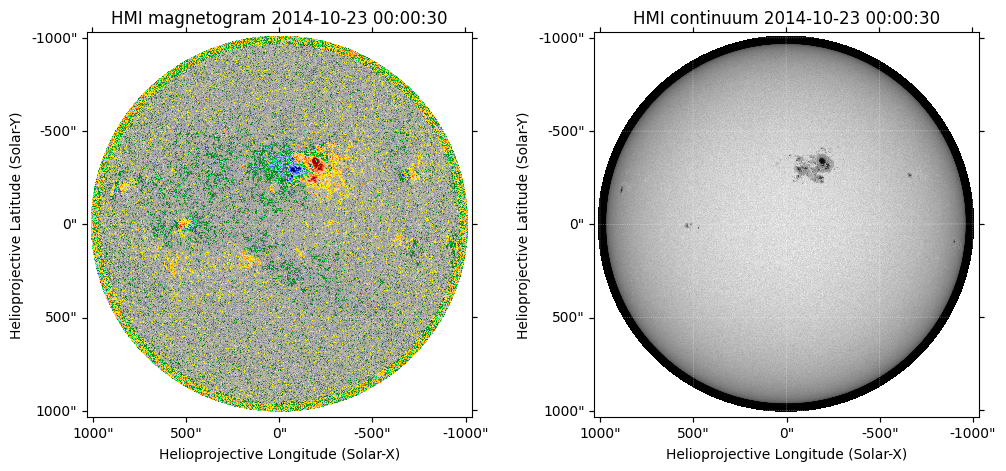

In [40]:
hmi_map = Map(downloaded_file[0])
cont_map = Map(downloaded_file2[0])

fig = plt.figure(figsize=(12,5))

ax1=fig.add_subplot(121, projection=hmi_map)

# change color map
hmi_map.plot_settings['cmap'] = "hmimag"

# clip range for colorbar scaling (you can see what happens
# if this is not present by commeting out and reloading data
#and plotting)
hmi_map.plot_settings['norm'] = plt.Normalize(-1500, 1500)

hmi_map.plot(axes=ax1)

ax2 = fig.add_subplot(122, projection=cont_map)
cont_map.plot(axes=ax2);


## Coordinates

When discussing the location of the features on the we always refer to a coordinate system. There are 3 main coordinates systems that are used for solar data:


*   Heliographic
*   Heliocentric
*   Helioprojective

It can be seen in the images above that the maps show Helioprojective. To find out more information about the different coordinate systems you should refer to [Thompson (2006)](https://ui.adsabs.harvard.edu/abs/2006A%26A...449..791T/abstract).


Sunpy has a way to help plot in and transform between the various coordinate systems. Similar to the way `units` can be used for representing physical quantities, sunpy uses `astropy.coordinates` to represent points in physical space. This applies to projected coordinates in images and points in 3D space.

The astropy coordinates module is primarily used through the `SkyCoord` class, which also makes use of the astropy units system:

In [5]:
from astropy.coordinates import SkyCoord

Astriopy contains many frames relevant to astronomy. However, to use the solar physics specific frames defined in sunpy we need to import and then create a `SkyCoord `object to represent a point on the Sun:

In [42]:
from sunpy.coordinates import frames

coord = SkyCoord(70*u.deg, -30*u.deg, obstime="2017-08-01", frame=frames.HeliographicStonyhurst)
coord

<SkyCoord (HeliographicStonyhurst: obstime=2017-08-01T00:00:00.000, rsun=695700.0 km): (lon, lat) in deg
    (70., -30.)>

This SkyCoord object can then be transformed to any other coordinate frame defined either in Astropy or sunpy (e.g., see [Supported Coordinate Systems](https://docs.sunpy.org/en/stable/reference/coordinates/index.html#sunpy-coordinate-systems)).

For example to transform from the original Stonyhurst frame to a Helioprojective (an observer-centric) frame:


In [43]:
coord.transform_to(frames.Helioprojective(observer="earth"))

<SkyCoord (Helioprojective: obstime=2017-08-01T00:00:00.000, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate for 'earth'>): (Tx, Ty, distance) in (arcsec, arcsec, km)
    (769.96270814, -498.89715922, 1.51668773e+08)>

You can also use arrays of coordinates with `SkyCoord` and is significantly faster than looping through lists of coordinates.

In [44]:
coord = SkyCoord([-500, 400]*u.arcsec, [100, 200]*u.arcsec, frame=frames.Helioprojective)
coord


<SkyCoord (Helioprojective: obstime=None, rsun=695700.0 km, observer=None): (Tx, Ty) in arcsec
    [(-500., 100.), ( 400., 200.)]>

In [45]:
coord[0]

<SkyCoord (Helioprojective: obstime=None, rsun=695700.0 km, observer=None): (Tx, Ty) in arcsec
    (-500., 100.)>

sunpy `Map` uses coordinates to specify locations on an image. This enables overlaying grids, points, etc. on plots of maps.

When a `Map` is created, a coordinate frame is constructed from the header information. This can be accessed using `.coordinate_frame`:


In [49]:
aia_map.coordinate_frame

<Helioprojective Frame (obstime=2014-08-29T13:01:55.120, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2014-08-29T13:01:55.120, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (0.01068737, 7.13308149, 1.51080756e+11)>)>

The coordinate frame can be used when creating a SkyCoord object to set the coordinate system to that of the image:


In [52]:
coord = SkyCoord(200 * u.arcsec, 30*u.arcsec, frame=aia_map.coordinate_frame)
coord

<SkyCoord (Helioprojective: obstime=2014-08-29T13:01:55.120, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2014-08-29T13:01:55.120, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (0.01068737, 7.13308149, 1.51080756e+11)>): (Tx, Ty) in arcsec
    (200., 30.)>

The SkyCoord object can be converted to pixels values using `GenericMap.wcs.world_to_pixel`:


In [54]:
pixels = aia_map.wcs.world_to_pixel(coord)
pixels

(array(2390.95609744), array(2088.25212241))

The SkyCoord object could also be used to plot, say, a line on top of the map. Let us plot a line of constant latitude. This involves a more comlicated chain of

Observe that we define the coordinates using a different coordinate frame (heliographic Stonyhurst) than the coordinate frame of the map (which is helioprojective Cartesian).

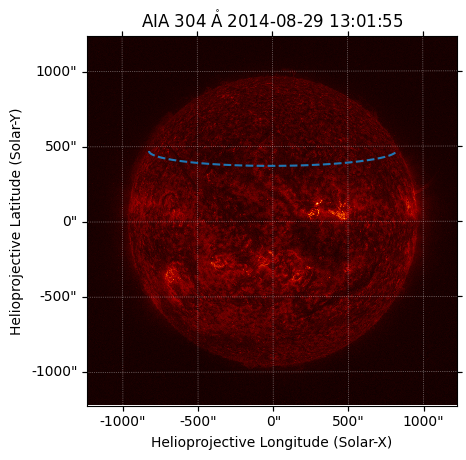

In [58]:
from sunpy.coordinates import HeliographicStonyhurst

longi = np.arange(-90,90,1)*u.deg
lat = np.full(180,30)*u.deg

coord = SkyCoord(longi, lat, frame=HeliographicStonyhurst, obstime=aia_map.date)

fig = plt.figure()
ax = plt.subplot(projection=aia_map)
aia_map.plot()
ax.plot_coord(coord, '--')

# Working with EISPAC

To work with data other instruements, you may need to install and master other packages.

An example of this is Hinode EIS data, which can be analysed with the [EISPAC software](https://github.com/USNavalResearchLaboratory/eispac)

A user guide can be found [here](https://eispac.readthedocs.io/en/latest/guide/index.html).

In [1]:
# Install eispac
try:
  import eispac
except ModuleNotFoundError:
  !pip install eispac

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 108.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 86.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.1/108.1 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 80.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.2/101.2 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 98.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 51.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 10.3 MB/s eta 0:00:00
  

Let's grab some data from the NRL repository:

In [6]:
import eispac.net
from eispac.net.attrs import FileType

results = Fido.search(a.Time('2020-11-09 00:00:00','2020-11-09 01:00:00'),
                      a.Instrument('EIS'),
                      a.Physobs.intensity,
                      a.Source('Hinode'),
                      a.Provider('NRL'),
                      a.Level('1'))
results

Start Time,End Time,Instrument,Physobs,Source,Provider,Level,FileType
Time,Time,str3,str9,str6,str3,str1,str11
2020-11-09 00:10:12.000,2020-11-09 00:10:12.999,EIS,intensity,HINODE,NRL,1,HDF5 data
2020-11-09 00:10:12.000,2020-11-09 00:10:12.999,EIS,intensity,HINODE,NRL,1,HDF5 header
2020-11-09 00:10:12.000,2020-11-09 00:10:12.999,EIS,intensity,HINODE,NRL,1,FITS


We see there are separate data and header files. There is also the option for obtaining the data in fits of HDF5 formats.

We will download the header and HDF5 file.


In [7]:
EIS_files = Fido.fetch(results[0][0:2])

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

eis_20201109_001012.head.h5:   0%|          | 0.00/546k [00:00<?, ?B/s]

eis_20201109_001012.data.h5:   0%|          | 0.00/157M [00:00<?, ?B/s]

In [8]:
EIS_files

['/root/sunpy/data/eis_20201109_001012.data.h5', '/root/sunpy/data/eis_20201109_001012.head.h5']

What is in these files? We shall peer in to the header first:

In [9]:
header_filename = EIS_files[1]

wininfo = eispac.read_wininfo(header_filename)
wininfo.dtype.names

('iwin', 'line_id', 'wvl_min', 'wvl_max', 'nl', 'xs')

The `read_wininfo` function can be used help identify the spectral contents of each data window. There is a window for each spectral line obsreved by EIS.

The output shows that we can find the window numbers, primary spectral line, min and max wavelengths (and other information) for each data window.

In [10]:
wininfo

rec.array([( 0, 'Fe XI 180.400', 180.03426, 180.72559, 32,  661),
           ( 1, 'Ca XV 182.100', 181.75139, 182.44266, 32,  738),
           ( 2, 'Fe X 184.720', 183.82512, 185.5865 , 80,  831),
           ( 3, 'Fe XII 186.750', 186.3891 , 187.0802 , 32,  946),
           ( 4, 'Fe XI 188.400', 187.86046, 188.90817, 48, 1012),
           ( 5, 'Ca XVII 192.470', 191.85039, 193.07619, 56, 1191),
           ( 6, 'Ca XIV 194.100', 193.65562, 194.52475, 40, 1272),
           ( 7, 'Fe XII 195.120', 194.85902, 195.37155, 24, 1326),
           ( 8, 'Fe IX 197.860', 197.59981, 198.11227, 24, 1449),
           ( 9, 'Ca XV 201.050', 200.78578, 201.29816, 24, 1592),
           (10, 'Fe XIII 202.040', 201.76598, 202.27834, 24, 1636),
           (11, 'Fe XIII 203.830', 203.5703 , 204.0826 , 24, 1717),
           (12, 'Ca XVI 208.500', 208.13603, 208.82637, 32, 1922),
           (13, 'Fe XIV 211.320', 211.0531 , 211.56522, 24, 2053),
           (14, 'Fe XXIV 255.000', 254.654  , 255.34427, 32, 2591)

Now read in the data cube using EISPAC. Note that we are only supplying the name of the data file, the header file is found automatically. We will focus on one of the the Fe XII lines:

In [11]:
data_filename = EIS_files[0]
data_cube = eispac.read_cube(data_filename, 195.119)

Data file,
   /root/sunpy/data/eis_20201109_001012.data.h5
Header file,
   /root/sunpy/data/eis_20201109_001012.head.h5
Found a wavelength 195.12 [Angstroms] in window 7


INFO:astropy:uncertainty should have attribute uncertainty_type.


INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]


Let's look at the dimensions of the data:

In [12]:
data_cube.dimensions

<Quantity [512.,  87.,  24.] pix>

For this EIS data we have 512 pixels along the slit (in the Solar-Y direction), 87 raster steps (along the Solar-X axis), and 24 pixels along the dispersion (wavelength) axis.

EIS can operate in raster mode or sit-and-stare mode.

Now let's see what the data looks like. We will integrate over all the wavelength positions in the data window, i.e. intergrate the emission over the spectral line:

<WCSAxes: >

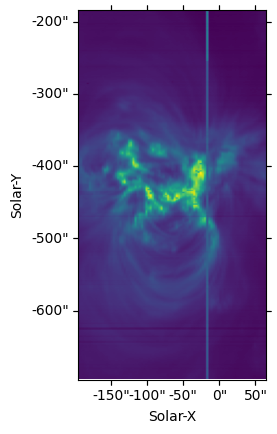

In [13]:
data_cube.sum_spectra().plot(aspect=data_cube.meta['aspect'])

We can also show the individual spectra at a particular location.

INFO:astropy:uncertainty should have attribute uncertainty_type.


INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]


Text(0.5, 1.0, 'ix = 48, iy = 326, units = counts')

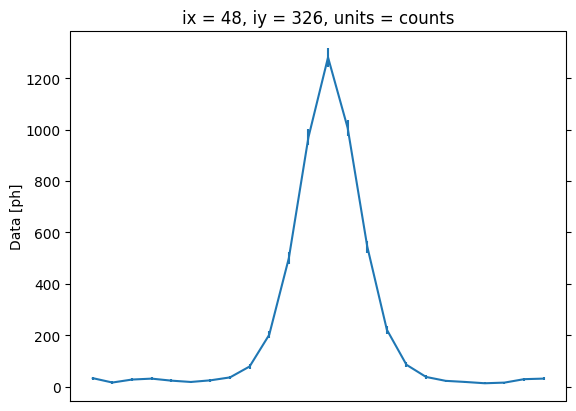

In [22]:
ix = 48
iy = 326
spec = data_cube[iy,ix,:].remove_radcal()
spec_plot = spec.plot()
spec_plot.set_title(f'ix = {ix}, iy = {iy}, units = counts')

<br>
<br>

## A very brief introduction to pandas

[Pandas](https://pandas.pydata.org) is an often used tool for data analysis, and is the standard for many scientific communities.

Pandas contains its own data structures and manipulation tools that streamline the process of working with data. It is especially beneficial if your data is in tabular form.

I only give a very basic insight here into the functionality that pandas has to offer. We will develop more of a feel for pandas as we go through the course. You can also find detailed tutorials on-line, e.g. [tutorial](https://pandas.pydata.org/pandas-docs/stable/getting_started).



In [59]:
# common import for pandas
import pandas as pd

Pandas has two main data types, which are

* series - a one-dimensional array-like object, containing a sequence of values and their data labels (or index)
* data frame - a rectangular table of data containing an ordered collection of columns.

### Data series

Here we will create a basic data series.

In [60]:
example = pd.Series([1, 9, 5, 70]) # these are the values
print(example)

0     1
1     9
2     5
3    70
dtype: int64


Each observation in the data series comes with a unique identifier, which is shown on the left-hand side. This can be changed if desired.

In [61]:
example2 = pd.Series([1, 9, 5, 70],index=['c', 'd', 'f', 'e'])
print(example2)
print(example2['f'])

c     1
d     9
f     5
e    70
dtype: int64
5


### Data frame
As mentioned, the data frame is a table that contains multiple columns. The columns are the variables of interest and the rows of the table are the observations. Note in the example below that each row has a unique ID (the same as with the series).

The data frame is able to contain mixed data types.

In [62]:
data = {'colour': ['blue','blue','red','green','red','blue'],
        'size': [10, 30, 15, 20, 50, 41],
        'Voltage': [0.1, 0.4, 1., 0.5, 0.31, 0.2]
        }
frame = pd.DataFrame(data)
frame

,colour,size,Voltage
0,blue,10,0.10
1,blue,30,0.40
2,red,15,1.00
3,green,20,0.50
4,red,50,0.31
5,blue,41,0.20


You can select individual columns by referring to the column title

In [63]:
frame['colour']

0     blue
1     blue
2      red
3    green
4      red
5     blue
Name: colour, dtype: object

A subset of the data frame can be accessed by giving multiple columns in a list.

In [64]:
frame[['colour', 'size']]

,colour,size
0,blue,10
1,blue,30
2,red,15
3,green,20
4,red,50
5,blue,41


Row access can be achieved by giving the row values via slicing:

In [65]:
frame[2:4]

,colour,size,Voltage
2,red,15,1.0
3,green,20,0.5


We can also create subsets of the data with relational operators:

In [66]:
new_df = frame[frame['colour'] == 'blue' ]
new_df

,colour,size,Voltage
0,blue,10,0.1
1,blue,30,0.4
5,blue,41,0.2


Pandas also works with matplotlib to provide some direct plotting functionality. It is recommened that you [read the docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) to find out all that is possible.

Here is brief example that counts all the unique enteries in the a particular column of the data frame:

In [67]:
frame['colour'].value_counts()

blue     3
red      2
green    1
Name: colour, dtype: int64

Then adding the plot command, and specifying a bar chart:

<Axes: >

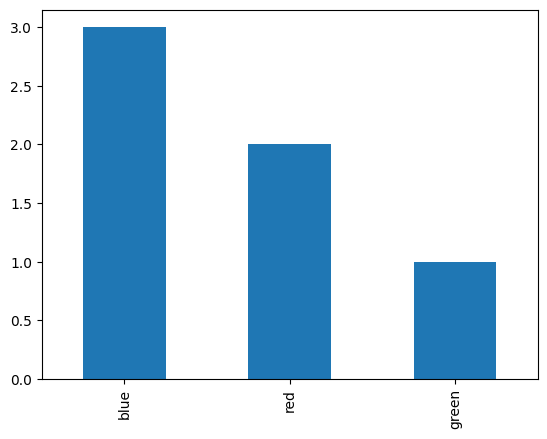

In [68]:
frame['colour'].value_counts().plot(kind='bar')

### Reading in external data

Often you will not be building the data frame yourself, but reading in data from an external source.

Lets try reading in our csv file with pandas:

In [75]:
# download file from KL7002 GitHub site

!wget https://raw.githubusercontent.com/Richardjmorton/KL7002_students/main/datasets/gas_experiment.csv

--2023-06-22 11:01:02--  https://raw.githubusercontent.com/Richardjmorton/KL7002_students/main/datasets/gas_experiment.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139 [text/plain]
Saving to: ‘gas_experiment.csv’

gas_experiment.csv  100%[===================>]     139  --.-KB/s    in 0s      

2023-06-22 11:01:03 (10.9 MB/s) - ‘gas_experiment.csv’ saved [139/139]



In [76]:
# Location of file on your computer
filepath = '/content/gas_experiment.csv'

df = pd.read_csv(filepath)
df

,pressure,temperature,volume
0,84087.0,293,0.001
1,168174.0,294,0.001
2,252261.0,295,0.001
3,336348.0,296,0.001
4,420435.0,297,0.001
5,504522.0,298,0.001
6,NaN,299,0.001


Easy enough!

If you open up the file in a text editor or excel, you will see it is quite simple, i.e., only contains column headers and the column data. You may have more complicated situations where the file contains additional unwanted information at the beginning or end. Using a few extra keywords in *read_csv* you can read in a clean table.

You may have noticed that the last value in the pressure column is given as NaN. This means that there was no data in this column for measurement 7, it's what is known as a missing value (for obvious reasons!).

Missing values are common, especially in large data sets. Before we can do any analysis on the data, we have to remove or replace missing values. We will just remove them here.

If there are a small number of values, you can remove them with the _drop_ method.

In [77]:
new_df = df.drop(6)
new_df

,pressure,temperature,volume
0,84087.0,293,0.001
1,168174.0,294,0.001
2,252261.0,295,0.001
3,336348.0,296,0.001
4,420435.0,297,0.001
5,504522.0,298,0.001


However, for a larger table you might want to use *dropna*:

In [78]:
new_df = df.dropna()
new_df

,pressure,temperature,volume
0,84087.0,293,0.001
1,168174.0,294,0.001
2,252261.0,295,0.001
3,336348.0,296,0.001
4,420435.0,297,0.001
5,504522.0,298,0.001


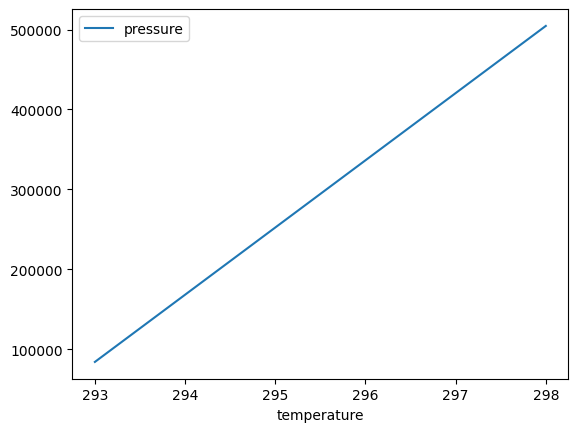

In [79]:
_ = new_df.plot('temperature','pressure')